In [1]:
# 데이터 불러오기
import pymysql
conn = pymysql.connect(host='localhost', user='root', password='root', db='crawling', charset='utf8')
cur = conn.cursor()
cur.execute('select * from corona')
data = cur.fetchall()
cur.close()
conn.close()

In [2]:
data[0][1]

'중앙방역대책본부 15일 0시 기준 지역발생 323명, 국외유입 21명14일 서울역 광장에 마련된 코로나19 임시 선별진료소에서 의료진이 검체를 채취하고 있다. 연합뉴스  15일 코로나19 신규 확진자가 344명 발생했다. 신규 확진자는 사흘째 300명대를 유지했다.  중앙방역대책본부는 이날 0시 기준으로 코로나19 국내 발생 신규 확진자는 323명, 국외유입 사례는 21명이라고 밝혔다. 국내 코로나19 누적 확진자는 8만3869명에 이른다. 신규 확진자 규모는 지난 13일부터 이날까지 사흘 연속 300명대를 유지하고 있지만, 이는 설 연휴 기간에 검사 건수가 감소한 영향으로 보인다.  국내 신규 확진자 323명 가운데 255명이 수도권에서 나왔다. 서울 147명, 경기 99명, 인천 9명이다. 비수도권에서는 부산 15명, 대구 12명, 충남 9명, 경북 8명, 대전 6명, 전북·전남 각 4명, 광주·울산·경남 각 3명, 강원 1명이 발생했다. 국외 유입 확진자 21명 가운데 6명은 검역 단계에서, 15명은 지역사회 격리 중에 확진됐다. 내국인은 9명, 외국인은 12명이다.  격리 중인 코로나19 환자 수는 104명 늘어 8548명이다. 위중증 환자는 156명으로 전날과 같다. 사망자는 5명 늘어 누적 1527명이다. 서혜미 기자 ham@hani.co.kr▶더불어 행복한 세상을 만드는 언론, 한겨레 구독하세요!▶esc 기사 보기▶4.7 보궐선거 기사 보기[ⓒ한겨레신문 : 무단전재 및 재배포 금지]'

In [3]:
content = [row[1] for row in data]

In [4]:
len(content)

818

In [5]:
type(content)

list

In [6]:
# 텍스트 데이터 전처리 함수
def preprocessing(txt):
    from tqdm import tqdm_notebook
    import re
    for i,t in enumerate(txt):
        txt[i] = re.sub('[^ㄱ-ㅎㅏ-ㅣ가-힣 ]', '', txt[i])
    sw = set() # 집합자료형 선언
    with open('stopwords-ko.txt', encoding='utf-8') as f:
        for w in f:
            sw.add(w.replace('\n',''))
            sw.add('뉴스')
            sw.add('기자')
            sw.add('금지')
            sw.add('연합뉴스')
            
    corpus = []
    from eunjeon import Mecab
    mecab = Mecab()
    for n in tqdm_notebook(range(len(txt))):
        doc = []
        for word in mecab.morphs(txt[n]):
            if word not in sw and len(word) > 1:
                doc.append(word)
        corpus.append(doc)
    return corpus

In [7]:
pre_content = preprocessing(content)

<ipython-input-6-540a7d8ae454>:19: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for n in tqdm_notebook(range(len(txt))):


In [8]:
pre_content[0]

['중앙',
 '방역',
 '대책',
 '본부',
 '기준',
 '지역',
 '발생',
 '국외',
 '유입',
 '명일',
 '서울역',
 '광장',
 '마련',
 '코로나',
 '임시',
 '선별',
 '진료소',
 '의료진',
 '검체',
 '채취',
 '코로나',
 '신규',
 '확진',
 '발생',
 '신규',
 '확진',
 '사흘',
 '유지',
 '중앙',
 '방역',
 '대책',
 '본부',
 '이날',
 '기준',
 '코로나',
 '국내',
 '발생',
 '신규',
 '확진',
 '국외',
 '유입',
 '사례',
 '명이',
 '라고',
 '밝혔',
 '국내',
 '코로나',
 '누적',
 '확진',
 '이른다',
 '신규',
 '확진',
 '규모',
 '지난',
 '이날',
 '사흘',
 '연속',
 '명대',
 '유지',
 '연휴',
 '기간',
 '검사',
 '건수',
 '감소',
 '영향',
 '보인다',
 '국내',
 '신규',
 '확진',
 '가운데',
 '수도',
 '나왔',
 '서울',
 '경기',
 '수도',
 '부산',
 '충남',
 '경북',
 '대전',
 '전북',
 '전남',
 '광주',
 '울산',
 '경남',
 '발생',
 '국외',
 '유입',
 '확진',
 '가운데',
 '검역',
 '단계',
 '지역',
 '사회',
 '격리',
 '확진',
 '내국인',
 '외국인',
 '격리',
 '코로나',
 '환자',
 '중증',
 '환자',
 '전날',
 '사망자',
 '누적',
 '서혜',
 '더불',
 '행복',
 '세상',
 '만드',
 '언론',
 '한겨레',
 '구독',
 '세요',
 '기사',
 '보궐',
 '선거',
 '기사',
 '한겨레',
 '신문',
 '무단',
 '전재',
 '배포']

In [9]:
len(pre_content)

818

In [10]:
# 말뭉치
import pandas as pd
corpus = []
for doc in pre_content:
    for w in doc:
        corpus.append(w)

In [11]:
len(corpus)

141534

In [12]:
corpus[:10]

['중앙', '방역', '대책', '본부', '기준', '지역', '발생', '국외', '유입', '명일']

In [13]:
from collections import Counter
cnt = Counter(corpus)
cnt.items()

dict_items([('중앙', 260), ('방역', 499), ('대책', 261), ('본부', 270), ('기준', 310), ('지역', 446), ('발생', 589), ('국외', 13), ('유입', 178), ('명일', 2), ('서울역', 62), ('광장', 56), ('마련', 128), ('코로나', 3349), ('임시', 151), ('선별', 186), ('진료소', 88), ('의료진', 116), ('검체', 43), ('채취', 26), ('신규', 436), ('확진', 1798), ('사흘', 44), ('유지', 140), ('이날', 347), ('국내', 384), ('사례', 235), ('명이', 39), ('라고', 534), ('밝혔', 467), ('누적', 312), ('이른다', 8), ('규모', 175), ('지난', 480), ('연속', 100), ('명대', 182), ('연휴', 340), ('기간', 200), ('검사', 536), ('건수', 197), ('감소', 440), ('영향', 179), ('보인다', 89), ('가운데', 229), ('수도', 407), ('나왔', 150), ('서울', 718), ('경기', 178), ('부산', 221), ('충남', 72), ('경북', 76), ('대전', 137), ('전북', 59), ('전남', 72), ('광주', 103), ('울산', 80), ('경남', 82), ('검역', 38), ('단계', 327), ('사회', 301), ('격리', 301), ('내국인', 17), ('외국인', 50), ('환자', 416), ('중증', 82), ('전날', 176), ('사망자', 292), ('서혜', 2), ('더불', 41), ('행복', 23), ('세상', 79), ('만드', 18), ('언론', 174), ('한겨레', 20), ('구독', 624), ('세요', 253), ('기사', 69), ('보궐'

In [14]:
freq_df = pd.DataFrame(cnt.items(), columns=['word','freq'])

In [15]:
import nltk

In [16]:
text = nltk.Text(corpus)
text.vocab().most_common(10)

[('코로나', 3349),
 ('확진', 1798),
 ('다고', 1046),
 ('백신', 915),
 ('바이러스', 876),
 ('접종', 785),
 ('배포', 722),
 ('서울', 718),
 ('무단', 718),
 ('전재', 656)]

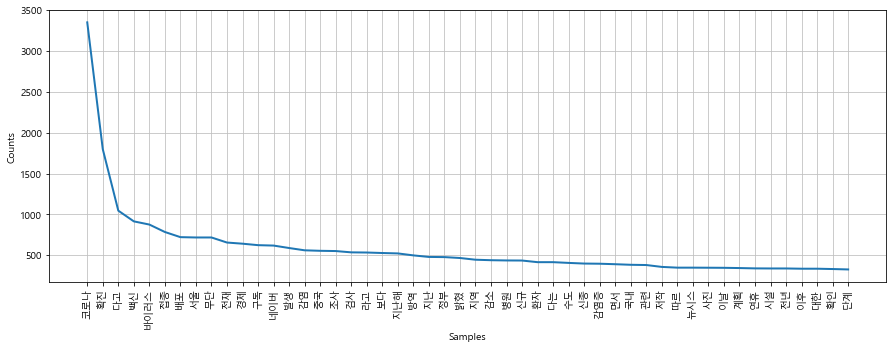

In [17]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font = font_manager.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font)
plt.figure(figsize=(15,5))
text.plot(50)

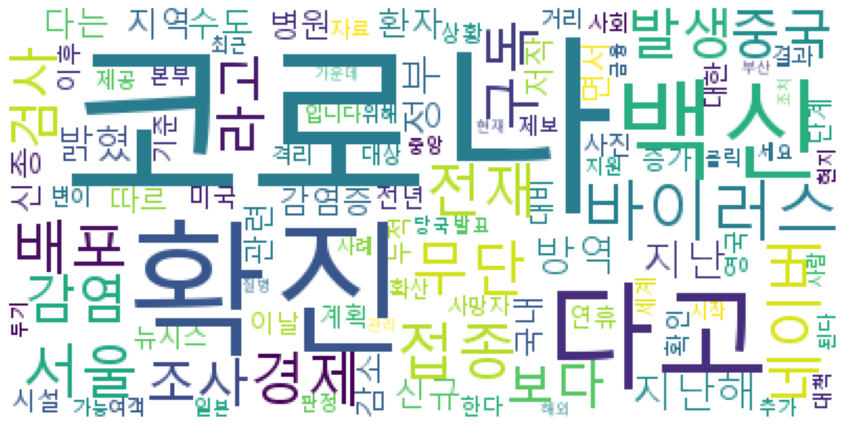

In [18]:
from wordcloud import WordCloud
data = text.vocab().most_common(100)
plt.figure(figsize=(15,10))

wc = WordCloud(background_color='white', font_path='C:/Windows/Fonts/malgun.ttf')
plt.imshow(wc.generate_from_frequencies(dict(data)))

plt.axis('off')
plt.show()